# Умножение на 3

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential([
    Dense(1, input_shape=(1, ), activation='linear')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.get_weights()

[array([[0.37373078]], dtype=float32), array([0.], dtype=float32)]

In [ ]:
#создаем датасет
import numpy as np

x = np.array([[1], [3], [2], [7], [9], [10], [13]])
y = np.array([[3], [9], [6], [21], [27], [30], [39]])

In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics='mae')

In [ ]:
model.fit(x, y, epochs=100)

In [ ]:
model.predict([[8], [9], [15]])

1/1 [==============================] - 0s 86ms/step


array([[24.01074],
       [27.00125],
       [44.94431]], dtype=float32)

# Сложение двух чисел

In [ ]:
X1 = np.random.randint(1, 10, size=50)
X2 = np.random.randint(1, 10, size=50)

y = X1 + X2

In [ ]:
X = np.vstack([X1, X2]).T
X

array([[1, 6],
       [4, 1],
       [2, 9],
       [6, 9],
       [8, 9],
       [6, 9],
       [9, 2],
       [7, 1],
       [1, 1],
       [6, 6],
       [1, 7],
       [4, 8],
       [2, 4],
       [4, 4],
       [2, 3],
       [2, 8],
       [2, 6],
       [9, 1],
       [2, 9],
       [1, 4],
       [8, 4],
       [7, 4],
       [9, 6],
       [8, 7],
       [5, 8],
       [4, 4],
       [7, 7],
       [7, 7],
       [3, 1],
       [4, 7],
       [6, 8],
       [5, 6],
       [1, 5],
       [4, 8],
       [2, 2],
       [4, 6],
       [4, 9],
       [1, 4],
       [9, 4],
       [7, 5],
       [1, 6],
       [6, 7],
       [7, 2],
       [7, 3],
       [9, 4],
       [2, 3],
       [4, 2],
       [8, 2],
       [4, 3],
       [8, 8]])

In [ ]:
y = y[None]
y = y.T
y

array([[ 7],
       [ 5],
       [11],
       [15],
       [17],
       [15],
       [11],
       [ 8],
       [ 2],
       [12],
       [ 8],
       [12],
       [ 6],
       [ 8],
       [ 5],
       [10],
       [ 8],
       [10],
       [11],
       [ 5],
       [12],
       [11],
       [15],
       [15],
       [13],
       [ 8],
       [14],
       [14],
       [ 4],
       [11],
       [14],
       [11],
       [ 6],
       [12],
       [ 4],
       [10],
       [13],
       [ 5],
       [13],
       [12],
       [ 7],
       [13],
       [ 9],
       [10],
       [13],
       [ 5],
       [ 6],
       [10],
       [ 7],
       [16]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_norm = mms.fit_transform(X)

In [ ]:
model = Sequential([
    Dense(3, input_shape=(2,), activation='linear'),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 3)                 9         
                                                                 
 dense_8 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics='mae')

In [ ]:
model.fit(X_norm, y, epochs=200)

In [ ]:
X_test = [[1, 8],
          [6, 9]]

X_test = mms.transform(X_test)
model.predict(np.array(X_test))

1/1 [==============================] - 0s 58ms/step


array([[ 9.000168],
       [14.999064]], dtype=float32)

# Классификация MNIST

In [ ]:
from keras.datasets import mnist
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
idxs = np.where((y_train == 0) | (y_train == 1))
y_train = y_train[idxs]
X_train = X_train[idxs]
X_train.shape, y_train.shape

((12665, 28, 28), (12665,))

In [ ]:
idxs = np.where((y_test == 0) | (y_test == 1))
y_test = y_test[idxs]
X_test = X_test[idxs]
X_test.shape, y_test.shape

((2115, 28, 28), (2115,))

array([0, 1, 1, 1, 1], dtype=uint8)

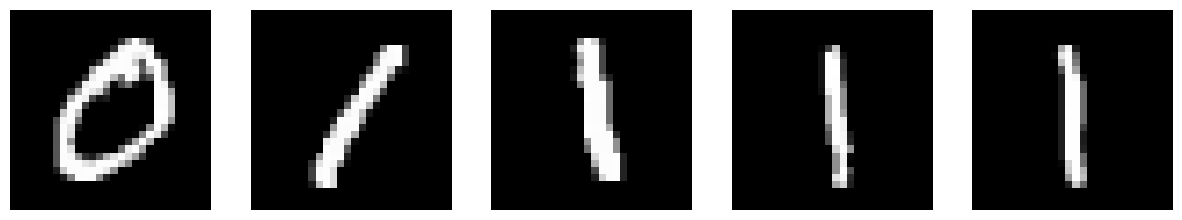

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(X_train[i], cmap='gray')
    ax[i].axis('off')

y_train[:5]    

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
from keras.utils.np_utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

y_train_cat[:5]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
# добавляем новую ось
X_train[..., np.newaxis].shape

(12665, 28, 28, 1)

array([0, 1, 1, 1, 1], dtype=uint8)

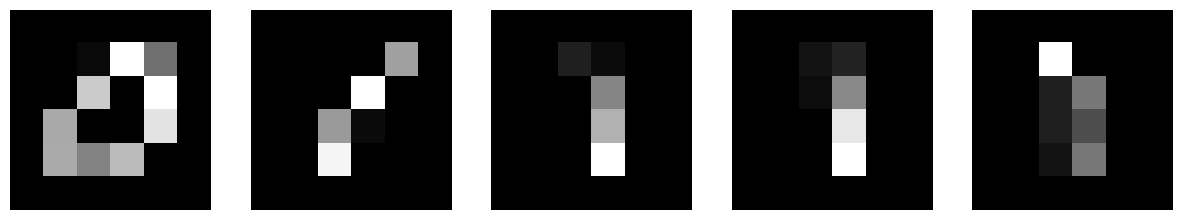

In [ ]:
import tensorflow as tf

X_train_resized = tf.image.resize(X_train[..., np.newaxis], (6, 6))[..., 0]
X_test_resized = tf.image.resize(X_test[..., np.newaxis], (6, 6))[..., 0]

fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(X_train_resized[i], cmap='gray')
    ax[i].axis('off')

y_train[:5]  

In [ ]:
from keras.layers import Flatten

model = Sequential([
    Flatten(input_shape=(6, 6)),
    Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 36)                0         
                                                                 
 dense_9 (Dense)             (None, 2)                 74        
                                                                 
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics='accuracy')

In [ ]:
model.fit(X_train_resized, y_train_cat, epochs=5)

Epoch 1/5
396/396 [==============================] - 1s 2ms/step - loss: 0.6101 - accuracy: 0.7010
Epoch 2/5
396/396 [==============================] - 1s 2ms/step - loss: 0.4732 - accuracy: 0.9213
Epoch 3/5
396/396 [==============================] - 1s 3ms/step - loss: 0.3887 - accuracy: 0.9541
Epoch 4/5
396/396 [==============================] - 2s 5ms/step - loss: 0.3326 - accuracy: 0.9664
Epoch 5/5
396/396 [==============================] - 2s 6ms/step - loss: 0.2929 - accuracy: 0.9713


In [ ]:
print(model.predict(X_test_resized[:1]))
print(y_test[:1])

1/1 [==============================] - 0s 55ms/step
[[0.22914873 0.79296905]]
[1]


In [ ]:
prediction = model.predict(X_test_resized[:1])
prediction.argmax()

1/1 [==============================] - 0s 27ms/step


1